# MCAR vs MAR vs MNAR

*Extract from https://medium.com/towards-data-science/statistical-test-for-mcar-in-python-9fb617a76eac*

## MCAR:

### What does it mean? 
- **When missing data points do not follow any particular reasoning or a pattern.**
- *For example*, you have the demographic data of residents in your community. 
    - But there are 50% missing values under the variable “Middle Name”. 
    - This 50% of data is a perfect example of data MCAR. 
    - There is no pattern or a specific reason behind the middle name being blank in most of the entries.

### How to deal with it? 

The following methods can be adopted in case of data MCAR.

**a. List-wise deletion:** Deleting the record if the dataset has missing data in any of its variables/columns. 
- This works best only when the missing data is small in number, like when in a dataset **only 2%** of the data is missing completely at random.

**b. Pair-wise deletion:** Pairwise deletion only deletes cases when one of the variables being used in the statistical method that is considered, is missing.

- Internally, it works along the same lines of a correlation matrix. 
    - In case of missing values between two variables, (in pairwise-sense) finding a correlation matrix takes all the complete cases for those two variables into account. 
- Let’s say the number of cases in this scenario is N.
    - When another set of variables is taken and the correlation matrix is calculated, the number of complete cases would differ from N.
    - This serves as the major difference between Listwise and Pairwise deletion.
- Pairwise deletion has the advantage of minimal data loss. When there is a dataset that has widespread missing values in almost all variables, pairwise would be a wiser choice of missing value treatment.

**c. Mean, median & mode imputation:** Missing values can also be replaced with the mean, median, and mode values of the respective variables.

## MAR:

### What does it mean? 
- When missing data points follow a pattern. 
- *Let’s take the same example of the demographic data of residents in your community. *
    - But this time the salary of **few men who have ages greater than 45 are missing**.
    - Here the missingness in data is attributed to another variable’s data. 
    - Hence, it follows a “missing at Random’ mechanism. 
- MAR is probably most tricky to understand because of its name.

### How to deal with it?
- Since there is a relationship involved in this mechanism, the best option here would be to go for an imputation technique —**mean, median, mode, or multiple imputations**.

## MNAR:
### What does it mean? 
- When missing data points follow a pattern with its data, it is meant to follow an MNAR mechanism. 
- *For example, in the same demographic data of residents in your community, let’s **say the salary of a few men is missing when salary is beyond a certain amount**. (say a million)*

- Here, it follows a “Missing Not at Random’ mechanism. 
- Typically, when data missing is not MCAR or MAR, it tends to follow MNAR.

### How to deal with it?
- Since there is a self-induced relationship in MNAR’s case, the best way to avoid them is to do some **data collection or model the missing data**.

- The reason why we need to analyze the missing value mechanisms is that we need to understand the best way to impute the missing value so that the accuracy of our ML models stays uninfluenced.

In [ ]:
import numpy as np # álgebra lineal
import pandas as pd # procesamiento de datos, E/S de archivos CSV (p. ej. pd.read_csv)
import matplotlib.pyplot as plt # para visualización de datos
import seaborn as sns # para visualización de datos estadísticos
import pylab
import scipy.stats as stats
import datetime
%matplotlib inline

pd.set_option('display.max_columns', None)

# load the dataset
titanic = pd.read_csv('../../data/titanic/train.csv')

In [ ]:
titanic.columns

In [ ]:
titanic.isna().sum()

## Chi-Square test
The Chi-Square test of independence is used to determine if there is an association between two categorical variables. A contingency table or a crosstab is used by the chi-sq. test to check for the frequency in those categories.

The **Cramer’s coefficient** is a measure of association between two nominal variables, giving a value between 0 and +1.

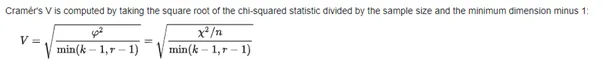

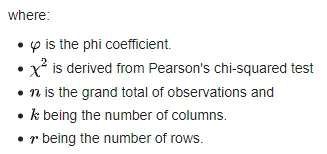

Generally, the accepted category for any Cramer’s coefficient association is taken from a standard set of intervals.

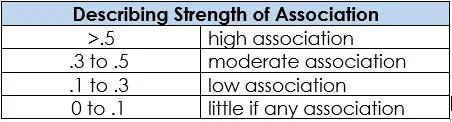

The columns — “Independent” show the result of the chi-sq test significance. If the p-value for chi-sq was <0.05, the association is going to be dependent.

In [ ]:
import scipy.stats as ss

# Implementation of cramer's coef
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    print('n',n)

    phi2 = chi2/n
    print('phi2',phi2)

    r, k = confusion_matrix.shape
    print('r, k',r, k)

    print('phi2 - ((k-1)*(r-1))/(n-1)',phi2 - ((k-1)*(r-1))/(n-1))

    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    print('phi2corr',phi2corr)

    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)

    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [ ]:
titanic_cat = titanic.select_dtypes(include='object')
titanic_cat.columns

In [ ]:
# confusion matrix can be calculated via a built-in pandas method for categorical columns via:


confusion_matrix = pd.crosstab(titanic['Sex'], titanic['Cabin'])
confusion_matrix

In [ ]:
cramers_corrected_stat(confusion_matrix)